In [10]:
project_path = "/home/diego-ngz/Git/thesis-tabtrans"
sys.path.append(project_path) #This helps to be able to import the data from the parent directory to other files

import sys
from utils import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df_id = 1484
sample_size = [100, 80, 60, 40, 20]

name_df = data.get_dataset_name(df_id)

path_of_datset = f'{project_path}/Final_models_4/{name_df}' #The path can be changed

tabtrans_folder = f'{path_of_datset}/tabtrans/final_tabtrans_cv'
xgboost_folder = f'{path_of_datset}/xgboost/final_xgboost'

tabtrans_means_ba = [] #ba = balanced accuracy
tabtrans_std_ba = []

tabtrans_means_a = [] #a = accuracy
tabtrans_std_a = []

xgboost_means_ba = []
xgboost_std_ba = []

xgboost_means_a = []
xgboost_std_a = []


for sample in sample_size:
    result_tabrans = f"{tabtrans_folder}/{sample}/results.csv"
    result_xgboost = f"{xgboost_folder}/{sample}/results.csv"

    df_tabtrans = pd.read_csv(result_tabrans)
    df_xgboost = pd.read_csv(result_xgboost)

    if sample == 100:

        tabtrans_means_ba.append(df_tabtrans['balanced_accuracy'].iloc[0])
        tabtrans_means_a.append(df_tabtrans['accuracy'].iloc[0])
        
        tabtrans_std_ba.append(0)
        tabtrans_std_a.append(0)

        xgboost_means_ba.append(df_xgboost['balanced_accuracy'].iloc[0])
        xgboost_means_a.append(df_xgboost['accuracy'].iloc[0])

        xgboost_std_ba.append(0)
        xgboost_std_a.append(0)
    
    else:
        tabtrans_means_ba.append(df_tabtrans['balanced_accuracy_mean'].iloc[0])
        tabtrans_means_a.append(df_tabtrans['accuracy_mean'].iloc[0])
        
        tabtrans_std_ba.append(df_tabtrans['balanced_accuracy_std'].iloc[0])
        tabtrans_std_a.append(df_tabtrans['accuracy_std'].iloc[0])

        xgboost_means_ba.append(df_xgboost['balanced_accuracy_mean'].iloc[0])
        xgboost_means_a.append(df_xgboost['accuracy_mean'].iloc[0])

        xgboost_std_ba.append(df_xgboost['balanced_accuracy_std'].iloc[0])
        xgboost_std_a.append(df_xgboost['accuracy_std'].iloc[0])

/tmp/ipykernel_430527/1540946866.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  plt.errorbar(sample_size, xgboost_means_ba, yerr=xgboost_std_ba,
/tmp/ipykernel_430527/1540946866.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(sample_size, tabtrans_means_ba, yerr=tabtrans_std_ba,


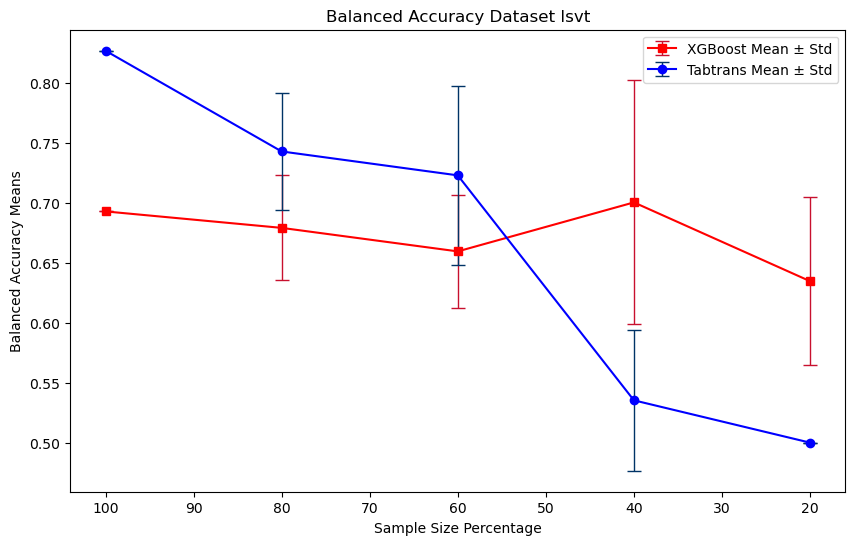

In [41]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot sample_size vs xgboost_means_ba with error bars for the standard deviation
plt.errorbar(sample_size, xgboost_means_ba, yerr=xgboost_std_ba, 
             fmt='s-', capsize=5, ecolor='#C8102E', elinewidth=1, 
             marker='s', color='red', label='XGBoost Mean ± Std')

# Plot sample_size vs tabtrans_means_ba with error bars for the standard deviation
plt.errorbar(sample_size, tabtrans_means_ba, yerr=tabtrans_std_ba, 
             fmt='o-', capsize=5, ecolor='#003366', elinewidth=1, 
             marker='o', color='blue', label='Tabtrans Mean ± Std')


# Optionally, invert x-axis if needed
plt.gca().invert_xaxis()  # Uncomment this line if you want to reverse the x-axis

# Add labels and title
plt.xlabel('Sample Size Percentage')
plt.ylabel('Balanced Accuracy Means')
plt.title(f'Balanced Accuracy Dataset {name_df}')
plt.legend()

# Show the plot
plt.show()